### IMPORT LIBRARIES

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
from matplotlib import pylab as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

### GETTING DATA

In [5]:
files = [file for file in os.listdir('C:/Users/DMS/Downloads/ecommerce_sales_analysis/dataset')] 

In [6]:
df = pd.DataFrame()

In [7]:
for i in files:
    data = pd.read_csv('dataset/'+i)
    df = pd.concat([df,data],axis=0)

In [8]:
df.shape

(186850, 6)

### DATA CLEANING

In [9]:
# Exclude header for each dataset inside dataframe
df = df[df['Order ID'] != 'Order ID']

In [10]:
df = df.reset_index()

In [11]:
df = df.drop(columns='index')

In [12]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
181081,254151,27in FHD Monitor,1,149.99,09/26/19 17:59,"135 Walnut St, Dallas, TX 75001"
123187,196881,AA Batteries (4-pack),1,3.84,05/20/19 21:16,"358 Willow St, San Francisco, CA 94016"
12365,188374,Google Phone,1,600,04/25/19 23:53,"787 Jackson St, Seattle, WA 98101"
104239,222129,27in FHD Monitor,1,149.99,06/12/19 10:16,"311 Lincoln St, Los Angeles, CA 90001"
54102,318420,AA Batteries (4-pack),1,3.84,12/19/19 11:21,"463 River St, Dallas, TX 75001"
62144,156948,Apple Airpods Headphones,1,150,02/03/19 15:45,"217 South St, Los Angeles, CA 90001"
16621,192450,AAA Batteries (4-pack),1,2.99,04/16/19 07:11,"372 Wilson St, San Francisco, CA 94016"
68994,142733,AAA Batteries (4-pack),3,2.99,01/24/19 00:44,"766 Pine St, New York City, NY 10001"
54023,318342,Lightning Charging Cable,1,14.95,12/23/19 23:47,"73 Pine St, Seattle, WA 98101"
130240,203592,Wired Headphones,1,11.99,05/13/19 15:28,"417 12th St, Seattle, WA 98101"


In [13]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [14]:
# Check null values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [15]:
# Check null values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN
1550,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184825,NaN,NaN,NaN,NaN,NaN,NaN
185087,NaN,NaN,NaN,NaN,NaN,NaN
185690,NaN,NaN,NaN,NaN,NaN,NaN
186196,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop null vales
df = df.dropna()

In [17]:
# Check null values
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### DATA PREPARATION

In [18]:
# Correcting data types

df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

df['Price Each'] = df['Price Each'].astype('float')

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
# Adding new feature

def feature_extraction(data):
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [20]:
df = feature_extraction(df)

In [21]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
73490,147020,Flatscreen TV,1,300.00,2019-01-22 21:41:00,"234 Ridge St, Atlanta, GA 30301",2019,1,21,41,300.00,Atlanta (GA)
6621,182893,Bose SoundSport Headphones,1,99.99,2019-04-24 23:55:00,"205 Johnson St, New York City, NY 10001",2019,4,23,55,99.99,New York City (NY)
147612,289095,AA Batteries (4-pack),1,3.84,2019-11-05 15:48:00,"511 10th St, Boston, MA 02215",2019,11,15,48,3.84,Boston (MA)
9877,186004,Lightning Charging Cable,1,14.95,2019-04-10 10:11:00,"347 Cherry St, San Francisco, CA 94016",2019,4,10,11,14.95,San Francisco (CA)
153844,295050,USB-C Charging Cable,1,11.95,2019-11-02 12:09:00,"553 Park St, Atlanta, GA 30301",2019,11,12,9,11.95,Atlanta (GA)


### DESCRIPTIVE DATA ANALYSIS

Descriptive data analysis is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [22]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,2019.000183,7.059140,14.413305,29.481361,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,2020.000000,12.000000,23.000000,59.000000,3400.000000
std,0.442793,332.731330,NaN,0.013521,3.502996,5.423416,17.317573,332.919771


There is still data in year 2020, lets exclude them.

In [23]:
# Select only for year 2019
df = df[df['Year']==2019]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185916 entries, 0 to 186494
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Year              185916 non-null  int32         
 7   Month             185916 non-null  int32         
 8   Hour              185916 non-null  int32         
 9   Minute            185916 non-null  int32         
 10  Sales             185916 non-null  float64       
 11  Cities            185916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 15.6+ MB


In [25]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,185916.000000,185916.000000,185916,185916.0,185916.000000,185916.000000,185916.000000,185916.000000
mean,1.124368,184.387720,2019-07-18 21:10:53.291163904,2019.0,7.060248,14.415661,29.481744,185.478203
min,1.000000,2.990000,2019-01-01 03:07:00,2019.0,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 20:52:00,2019.0,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:09:30,2019.0,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019-10-26 06:58:00,2019.0,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2019-12-31 23:53:00,2019.0,12.000000,23.000000,59.000000,3400.000000
std,0.442749,332.722426,NaN,0.0,3.502358,5.421069,17.317339,332.911130


In [26]:
total_year_order = df.shape[0]

print(f'Total orders in 2019 : {total_year_order:,} orders')

Total orders in 2019 : 185,916 orders


In [27]:
total_product_sold = df['Quantity Ordered'].sum()

print(f'Total products sold in 2019 : {total_product_sold:,} items')

Total products sold in 2019 : 209,038 items


In [28]:
total_year_sales = df['Sales'].sum()

print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total sales in 2019 : 34,483,365.68 USD


### UNIVARIATE DATA ANALYSIS 

Univariate analysis is basically the simplest form to analyze data. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.

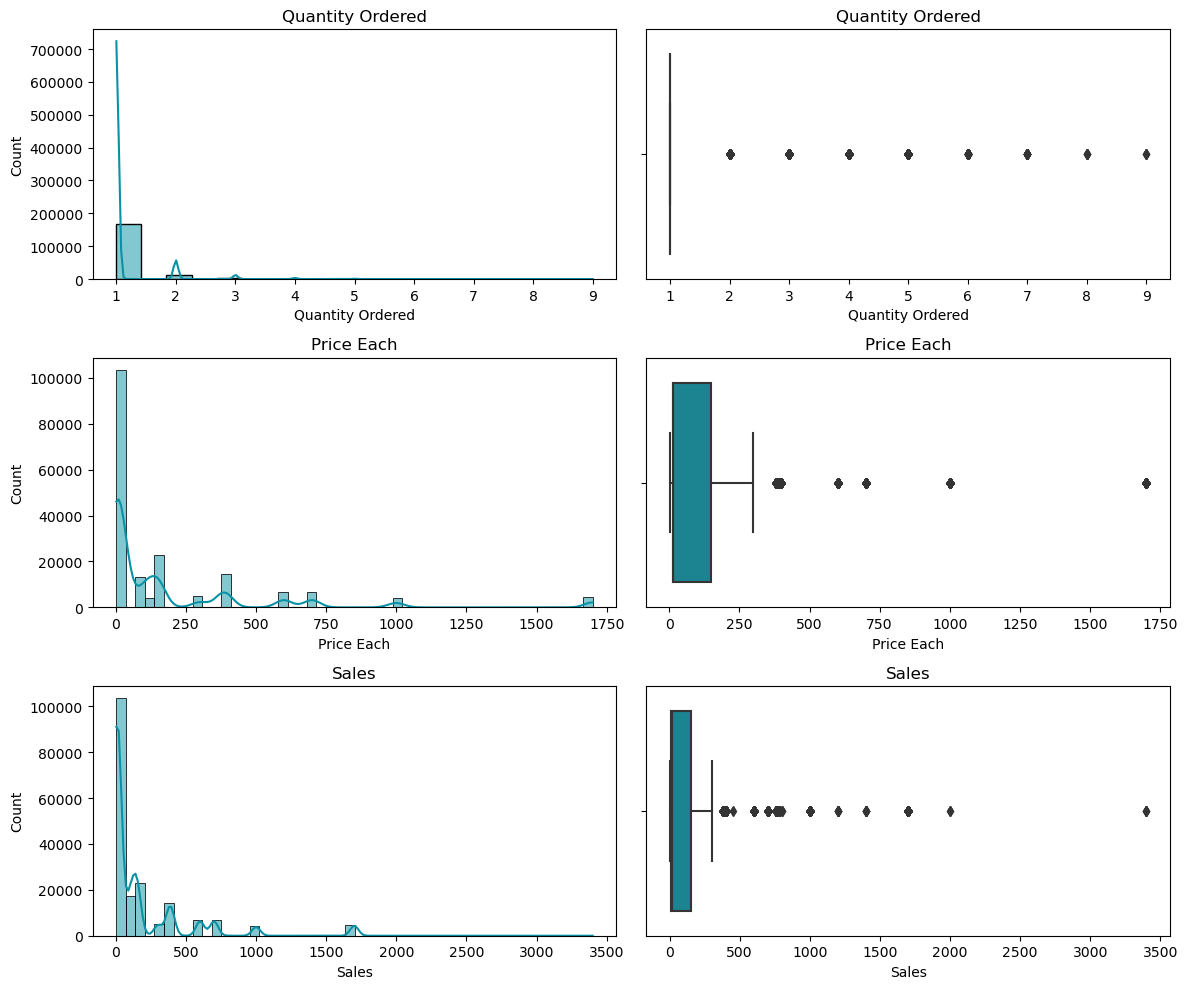

In [29]:
fig, ax = plt.subplots(3,2, figsize=(12,10))

sns.histplot(data=df,x='Quantity Ordered',kde=True,ax=ax[0,0])
sns.histplot(data=df,x='Price Each',kde=True,ax=ax[1,0],bins=50)
sns.histplot(data=df,x='Sales',kde=True,ax=ax[2,0],bins=50)

ax[0,0].set_title('Quantity Ordered')
ax[1,0].set_title('Price Each')
ax[2,0].set_title('Sales')

sns.boxplot(data=df,x='Quantity Ordered',ax=ax[0,1])
sns.boxplot(data=df,x='Price Each',ax=ax[1,1])
sns.boxplot(data=df,x='Sales',ax=ax[2,1])

ax[0,1].set_title('Quantity Ordered')
ax[1,1].set_title('Price Each')
ax[2,1].set_title('Sales')

plt.tight_layout()
plt.show()

Above graphs interpretation :
    
1) Mostly customer buys 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.

2) Price per item mostly in range 11.95 to 150.00.

3) Sales range are 11.95 to 150.00.

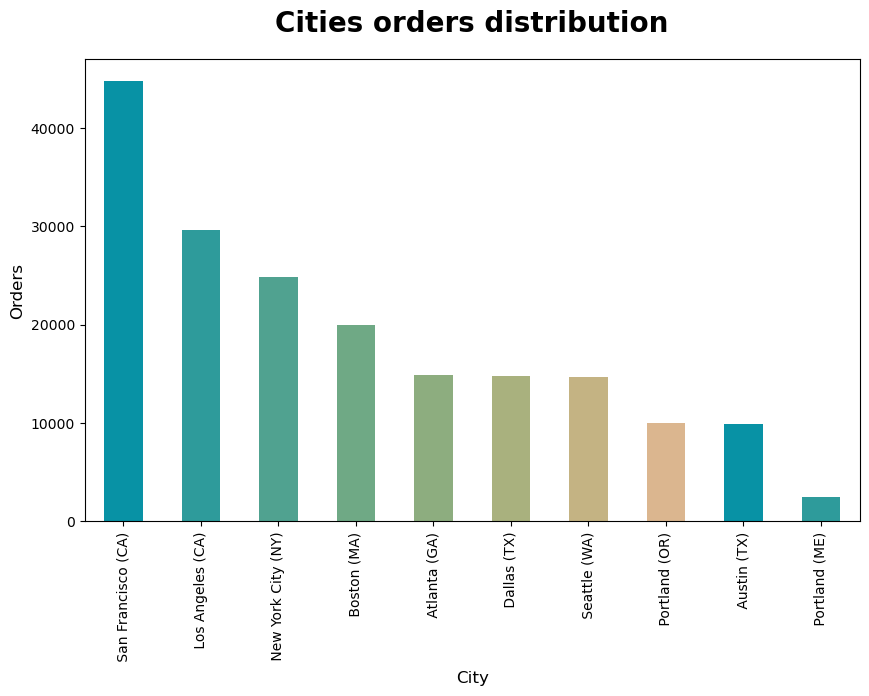

In [33]:
plt.figure(figsize=(10,6))

df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

plt.title('Cities orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)

plt.show()

Most of orders are from California (CA) specificly from San Francisco and Los Angeles around more than 40,000 and 30,000 orders. Average orders in cities are around 18,000 orders.

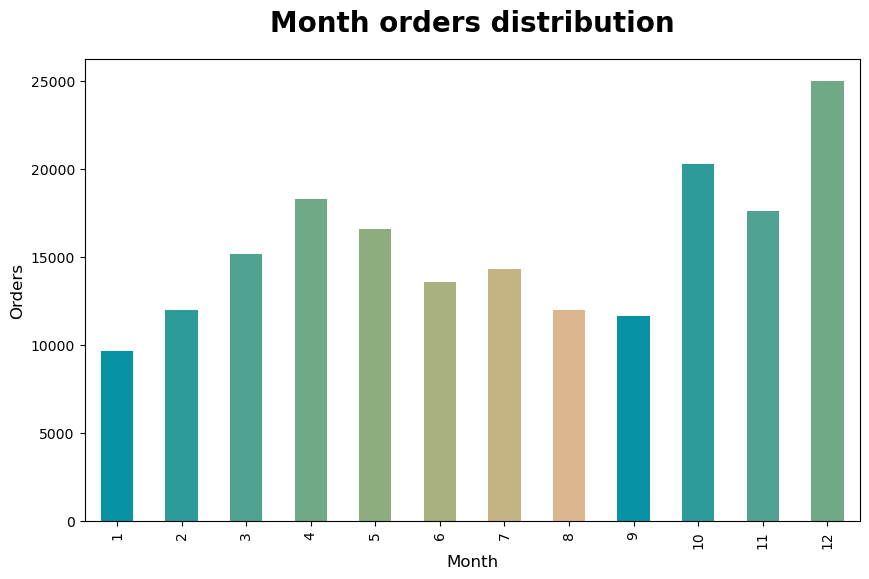

In [34]:
plt.figure(figsize=(10,6))

df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)

plt.show()

In [ ]:
High order are happend in December and October that have 25,000 and 20,000 orders. There is increasing order in January to April then decrease to September.